In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<Axes: xlabel='room_type'>

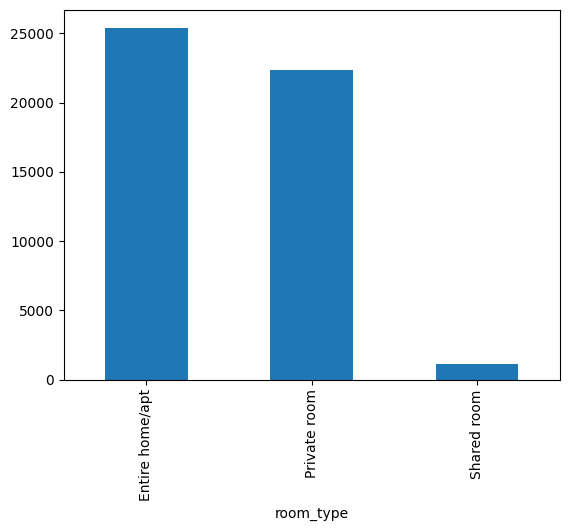

In [13]:
#Toplam oda sayısının oda tiplere göre dağılımı
df["room_type"].value_counts().plot.bar()

<Axes: ylabel='neighbourhood_group'>

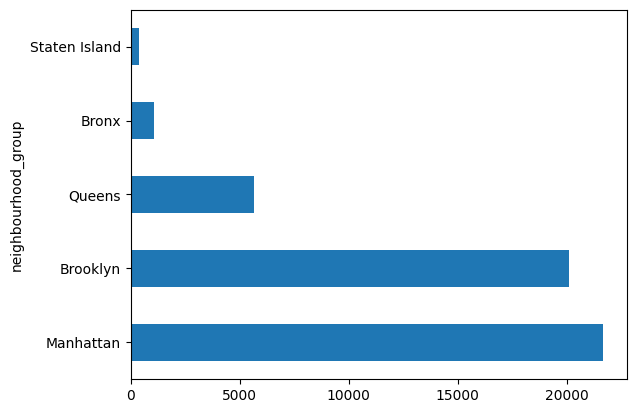

In [15]:
#Bölgere göre dağılım
df["neighbourhood_group"].value_counts().plot.barh()

<Axes: ylabel='price'>

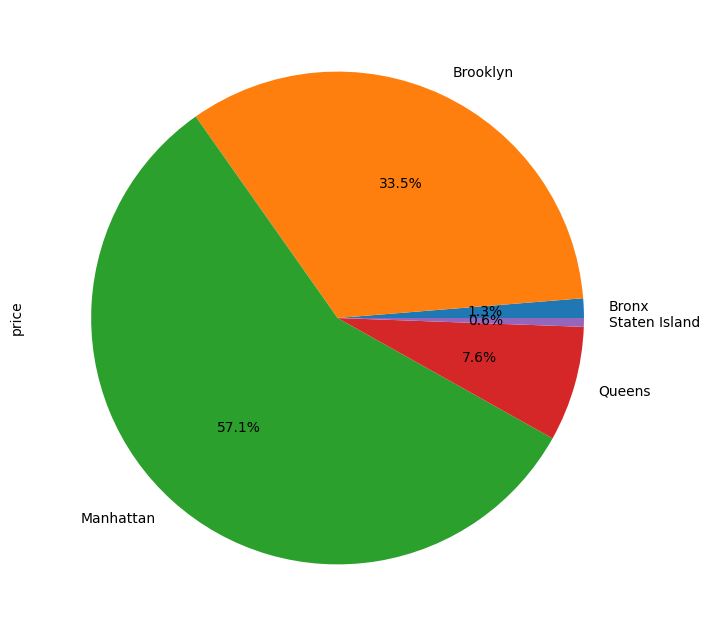

In [33]:
#Bölgere göre fiyatların toplamı ve pasta grafiğinde dağılımı
df.groupby("neighbourhood_group")["price"].sum().plot.pie(autopct="%.1f%%",figsize=(8,8))


<Axes: xlabel='neighbourhood_group', ylabel='count'>

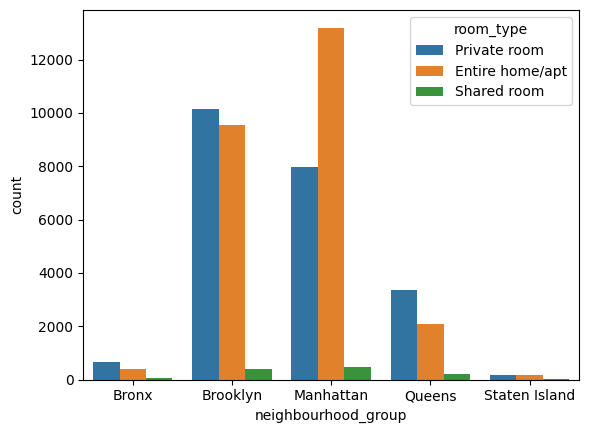

In [50]:
#Şehirlere göre  oda tiplerinin dağılımı
a  = df.groupby("neighbourhood_group")["room_type"].value_counts().reset_index()
sns.barplot(x=a["neighbourhood_group"],y=a["count"],hue=a["room_type"])

<Axes: ylabel='price'>

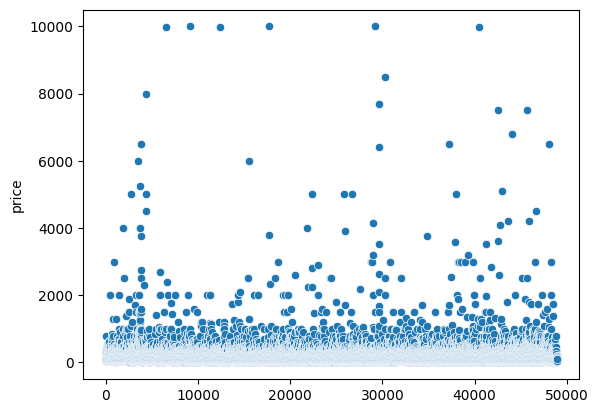

In [54]:
#Price değişkenine nokta grafiği üzerinden görselleştirilmesi
#Bu gösterimde outlier veriler gözlemlenir
sns.scatterplot(df["price"])

C:\Users\kggur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Neighbourhood - Price')

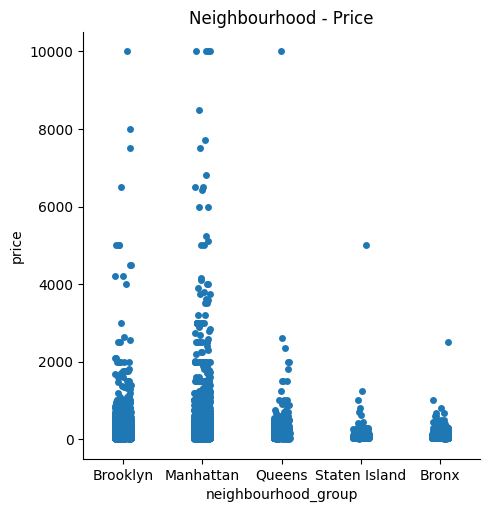

In [62]:
sns.catplot(x="neighbourhood_group", y="price", data=df)
plt.title("Neighbourhood - Price")

C:\Users\kggur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Average price by neighborhood and room type.')

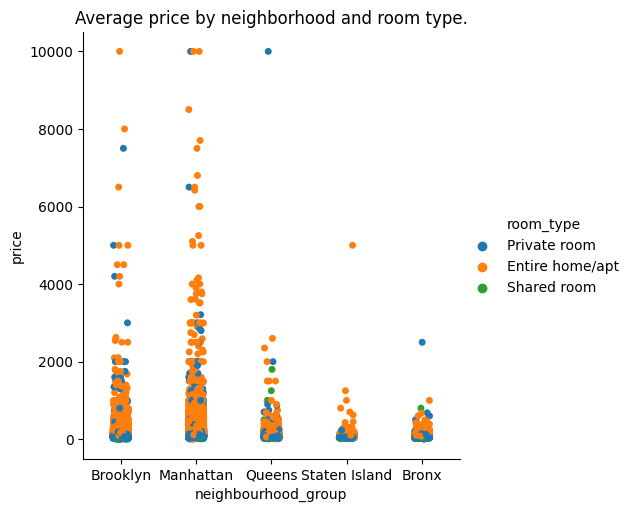

In [63]:
sns.catplot(data=df, x="neighbourhood_group", y="price", kind= 'strip' ,hue="room_type")
plt.title("Average price by neighborhood and room type.")